# Timeseries Analysis using Pandas
-------------------------------------------------------------------

Kushal Keshavamurthy Raviprakash

kushalkr2992@gmail.com

This notebook is a part of the [Python for Earth and Atmospheric Sciences](https://github.com/Kushalkr/Python_for_Earth_and_Atmospheric_Sciences) workshop.

In [1]:
%matplotlib inline

## Introduction
-------------------------------------------------------------------

<img src="images/pandas.png" style="float: right" />**`Pandas`** is a python package which provides fast, flexible and expressive data structures and is a package designed to make working with "relational" or "labelled" data easy and intuitive.

I find pandas very useful for timeseries analysis.

The pandas package is generally imported as :

```py
import pandas as pd
```

The most common data structures in `pandas` are:
* `Series` (1-Dimensional, labeled, homogeneous array)
* `DataFrame` (2-Dimensional, labeled with potentially heterogenous columns)
* `Panel` (3-Dimensional, size mutable array) [**DEPRECATED** and will be removed in the future]

In this lecture, we will look at the `Series` and `DataFrame` data structures in some detail.

Let us first import the necessary packages.

In [2]:
# Import necessary packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.__version__

'0.20.2'

We will use the [Arctic Oscillation (AO)](http://en.wikipedia.org/wiki/Arctic_oscillation) and [North Atlantic Oscillation (NAO)](http://en.wikipedia.org/wiki/North_Atlantic_oscillation) datasets as an example.

You can get the data from [here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii). But, as a sample, you will find it being present in the `data/` directory of my repository already.

`pandas` has some very good I/O facilities. But, for now we will stick to what we have learnt so far.

## Loading Data
-------------------------------------------------------------------

In [3]:
ao = np.loadtxt('data/monthly.ao.index.b50.current.ascii')
print(ao[0:2])

[[  1.95000000e+03   1.00000000e+00  -6.03100000e-02]
 [  1.95000000e+03   2.00000000e+00   6.26810000e-01]]


The data has three columns: year, month and the AO index value.

## Timeseries
-------------------------------------------------------------------

Timeseries of a single variable are usually put into the `Series` data structure provided by `pandas`.

To create a timeseries, we need to first create a time range for which we have the data and later use it to index the data. This is done with the help of the `date_range` function defined in the `pandas` module.

The data we have loaded ranges from January-1950 until May-2017. You may have to change the range if you obtain a newer version of the data. We use `freq = 'M'` which means the data is available every month.

In [4]:
dates = pd.date_range('1950-01','2017-01', freq='M') # Actual data is until 2017-06
dates

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', length=804, freq='M')

In [5]:
dates.shape

(804,)

We will use the data only until Dec-2016.

In [6]:
AO = pd.Series(ao[:804,2], index=dates)
AO

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-07-31   -0.802480
1950-08-31   -0.851010
1950-09-30    0.357970
1950-10-31   -0.378900
1950-11-30   -0.515110
1950-12-31   -1.928100
1951-01-31   -0.084969
1951-02-28   -0.399930
1951-03-31   -1.934100
1951-04-30   -0.776480
1951-05-31   -0.862780
1951-06-30   -0.917860
1951-07-31    0.090023
1951-08-31   -0.377410
1951-09-30   -0.817780
1951-10-31   -0.212910
1951-11-30   -0.068519
1951-12-31    1.987200
1952-01-31    0.368250
1952-02-29   -1.747200
1952-03-31   -1.859500
1952-04-30    0.538520
1952-05-31   -0.773510
1952-06-30   -0.440930
                ...   
2014-07-31   -0.488940
2014-08-31   -0.371540
2014-09-30    0.101910
2014-10-31   -1.134400
2014-11-30   -0.530300
2014-12-31    0.412920
2015-01-31    1.091600
2015-02-28    1.042600
2015-03-31    1.837400
2015-04-30    1.215700
2015-05-31    0.762760
2015-06-30    0.427040
2015-07-31 

Let's see how the data looks.

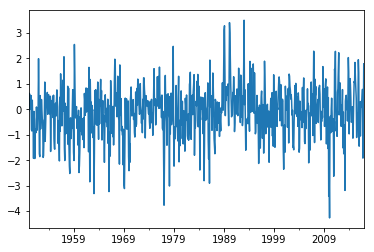

In [7]:
AO.plot()

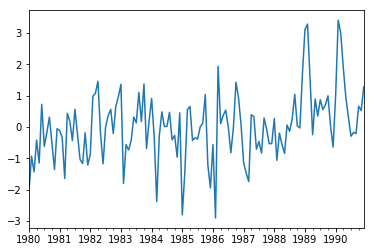

In [8]:
AO['1980':'1990'].plot()

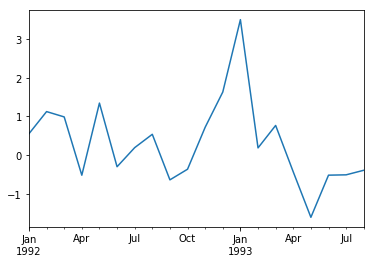

In [9]:
AO['1992-01':'1993-08'].plot()

Indexing data is very intuituve. For example:

In [10]:
AO['1992']

1992-01-31    0.55003
1992-02-29    1.12170
1992-03-31    0.98423
1992-04-30   -0.52053
1992-05-31    1.34140
1992-06-30   -0.30196
1992-07-31    0.19113
1992-08-31    0.53534
1992-09-30   -0.64030
1992-10-31   -0.36589
1992-11-30    0.71699
1992-12-31    1.62670
Freq: M, dtype: float64

In [11]:
AO['2016-07']

2016-07-31    0.084758
Freq: M, dtype: float64

You can also use fancy indexing as with arrays.

In [12]:
AO[np.logical_and((AO < 0.3),(AO > 0))]

1950-05-31    0.071577
1951-07-31    0.090023
1953-06-30    0.022535
1953-08-31    0.084960
1955-04-30    0.194230
1955-05-31    0.241610
1955-10-31    0.099053
1956-06-30    0.280140
1956-12-31    0.000891
1957-04-30    0.237660
1957-08-31    0.096898
1959-04-30    0.119240
1959-07-31    0.104720
1960-06-30    0.054978
1961-05-31    0.157480
1961-08-31    0.012693
1961-10-31    0.203080
1962-05-31    0.067997
1962-06-30    0.287070
1962-08-31    0.152070
1963-09-30    0.083110
1964-06-30    0.141590
1965-06-30    0.037800
1965-12-31    0.162970
1966-07-31    0.010944
1966-09-30    0.011063
1966-11-30    0.110560
1967-05-31    0.126510
1967-07-31    0.259260
1967-09-30    0.132930
                ...   
1996-11-30    0.136370
1997-08-31    0.120620
1997-09-30    0.194510
1998-10-31    0.294330
1999-01-31    0.110350
1999-04-30    0.284450
1999-05-31    0.225870
1999-09-30    0.059078
2000-08-31    0.143890
2003-02-28    0.127800
2003-07-31    0.075316
2003-12-31    0.265210
2005-08-31 

## DataFrame
-------------------------------------------------------------------

2-Dimensional data are handled well by the data structure called `Dataframe`. We will use the [North Atlantic Oscillation (NAO)](http://en.wikipedia.org/wiki/North_Atlantic_oscillation) data as an example. This data is available [here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii).

Create a `Series` the same way as the previously done for the AO data.

In [33]:
nao = np.loadtxt('data/norm.nao.monthly.b5001.current.ascii.txt')
dates_nao = pd.date_range('1950-01', '2017-01',freq='M')
print(dates_nao.dtype)
NAO = pd.Series(nao[:804,2],index=dates_nao)

datetime64[ns]


In [14]:
aonao = pd.DataFrame({'AO' : AO, 'NAO' : NAO})

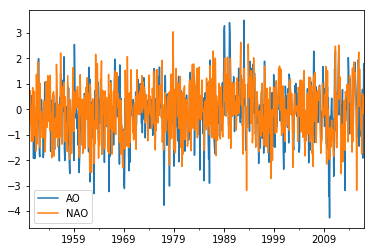

In [15]:
aonao.plot()

In [16]:
aonao.head()

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


Slicing works for both data.

In [17]:
aonao['1980':'1985']

,AO,NAO
1980-01-31,-2.065700,-0.75
1980-02-29,-0.933720,0.05
1980-03-31,-1.433300,-0.31
1980-04-30,-0.419130,1.29
1980-05-31,-1.154800,-1.50
1980-06-30,0.721490,-0.37
1980-07-31,-0.622210,-0.42
1980-08-31,-0.185190,-2.24
1980-09-30,0.312620,0.66
1980-10-31,-0.521210,-1.77


You can add more complexity to the slicing this way.

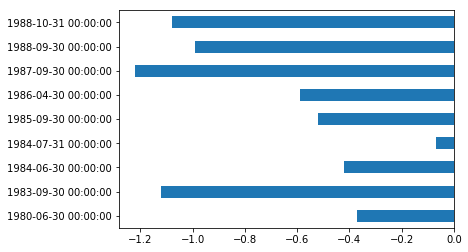

In [18]:
import datetime
aonao.loc[(aonao.AO > 0) & (aonao.NAO < 0)
         & (aonao.index > datetime.datetime(1980,1,1))
         & (aonao.index < datetime.datetime(1989,1,1)), 'NAO'].plot(kind='barh')

Here I have used the [DataFrame.loc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html?highlight=loc#pandas.DataFrame.loc) advanced indexing attribute. We choose all the necessary constraints such as, AO > 0, NAO < 0, date range between years 1980-1989 (I have used the datetime module for this) and then, voila! you have your sliced data according to your requirements.

## Statistics with Pandas
-------------------------------------------------------------------

In [19]:
aonao.min()

AO    -4.2657
NAO   -3.1800
dtype: float64

In [20]:
aonao.max()

AO     3.4953
NAO    3.0400
dtype: float64

In [21]:
aonao.mean()

AO    -0.116709
NAO   -0.018718
dtype: float64

In [22]:
aonao.median()

AO    -0.044346
NAO    0.025000
dtype: float64

In [23]:
print(aonao.mean(0))# This is the regular mean (column-wise)
print("\n Now let's see the mean of both indices:\n")
print(aonao.mean(1)) # Mean along row

AO    -0.116709
NAO   -0.018718
dtype: float64

 Now let's see the mean of both indices:

1950-01-31    0.429845
1950-02-28    0.513405
1950-03-31   -0.184064
1950-04-30    0.642550
1950-05-31   -0.259211
1950-06-30    0.239285
1950-07-31   -1.031240
1950-08-31   -0.450505
1950-09-30    0.303985
1950-10-31    0.235550
1950-11-30   -0.887555
1950-12-31   -1.474050
1951-01-31   -0.002485
1951-02-28    0.150035
1951-03-31   -1.477050
1951-04-30   -0.498240
1951-05-31   -0.726390
1951-06-30   -1.278930
1951-07-31    0.730012
1951-08-31   -0.298705
1951-09-30   -1.088890
1951-10-31    0.828545
1951-11-30   -0.229260
1951-12-31    1.653600
1952-01-31    0.649125
1952-02-29   -1.288600
1952-03-31   -1.674750
1952-04-30    0.774260
1952-05-31   -0.946755
1952-06-30   -0.420465
                ...   
2014-07-31   -0.156775
2014-08-31   -1.026520
2014-09-30    0.859105
2014-10-31   -1.202500
2014-11-30    0.073835
2014-12-31    1.135210
2015-01-31    1.440150
2015-02-28    1.182700
2015-03-31   

Or you can get all necessary statistics in one command.

In [24]:
aonao.describe()

,AO,NAO
count,804.000000,804.000000
mean,-0.116709,-0.018718
std,1.007779,1.011623
min,-4.265700,-3.180000
25%,-0.662915,-0.760090
50%,-0.044346,0.025000
75%,0.475240,0.681750
max,3.495300,3.040000


Getting correlation coefficients is also very easy.

In [25]:
aonao.corr()

,AO,NAO
AO,1.000000,0.605191
NAO,0.605191,1.000000


## Exercise

Try out basic pandas on some irregular data like the Bloomington station temperature and dew point temperature. 

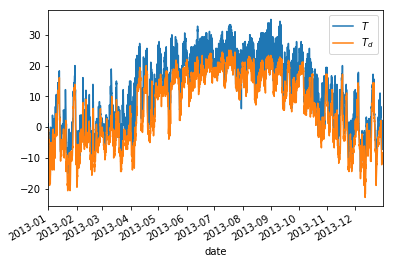

In [62]:
import datetime as dt
data = pd.read_csv('data/KBMG-2013.csv')

data['date'] = data.apply(lambda x: dt.datetime(x['yyyy'], x['mm'],x['dd'],x['hh'], x['mm.1']), axis=1)
data.set_index(data['date'], inplace=True)

T = pd.Series(data['temp'], index=data.index)
TD = pd.Series(data['dwpt'], index=data.index)

TTD = pd.DataFrame({'$T$': T, '$T_d$' : TD})

TTD.plot()

## Further Reading
-------------------------------------------------------------------
* [Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) - This link has links to multiple tutorials at the end apart from the official pandas tutorial.